In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
store_df = pd.read_csv("C:/Joel/Code Lancashire/Data Analysis/Datasets/superstore.csv", encoding='latin1')

In [7]:
store_df.shape

(9994, 21)

In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [13]:
store_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [77]:
# Loop through each column to find out the count of unique values in each column
for column in store_df.columns:
    print(f"Unique Items for {column}:") 
    print(store_df[column].value_counts()) 
    print("\n")

Unique Items for Row ID:
Row ID
1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: count, Length: 9994, dtype: int64


Unique Items for Order ID:
Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64


Unique Items for Order Date:
Order Date
2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-02    34
2017-12-01    34
              ..
2017-02-04     1
2015-02-10     1
2015-12-09     1
2014-01-03     1
2015-04-12     1
Name: count, Length: 483, dtype: int64


Unique Items for Ship Date:
Ship Date
12/16/2015    35
9/26/2017     34
12-06-2017    32
11/21/2017    32
09-06-2017    30
              ..
03-04-2014     1
02-11-2017     1
08-07-2016     1
04-08-2017     1
6/18/2015      1
Name: count, L

In [27]:
# Sales and Profit Analysis by Region
region_summary = store_df.groupby('Region').agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum')).reset_index()

# Calculate Profit_Margin
region_summary['Profit_Margin'] = (region_summary['Total_Profit'] / region_summary['Total_Sales']) * 100

print("Sales and Profit Summary by Region:")
print(region_summary)


Sales and Profit Summary by Region:
    Region  Total_Sales  Total_Profit  Profit_Margin
0  Central  501239.8908    39706.3625       7.921629
1     East  678781.2400    91522.7800      13.483399
2    South  391721.9050    46749.4303      11.934342
3     West  725457.8245   108418.4489      14.944831


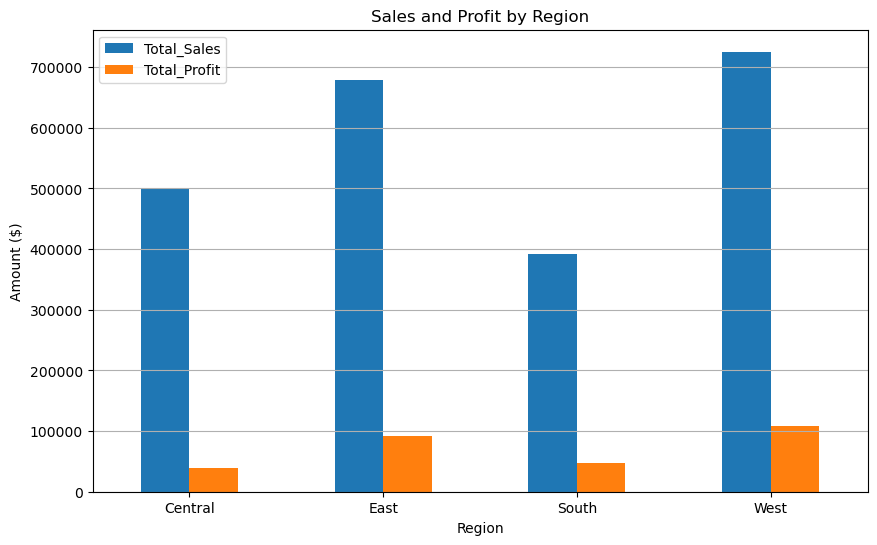

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))
region_summary.plot(x='Region', y=['Total_Sales', 'Total_Profit'], kind='bar', ax=ax1)
plt.title('Sales and Profit by Region')
plt.ylabel('Amount ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

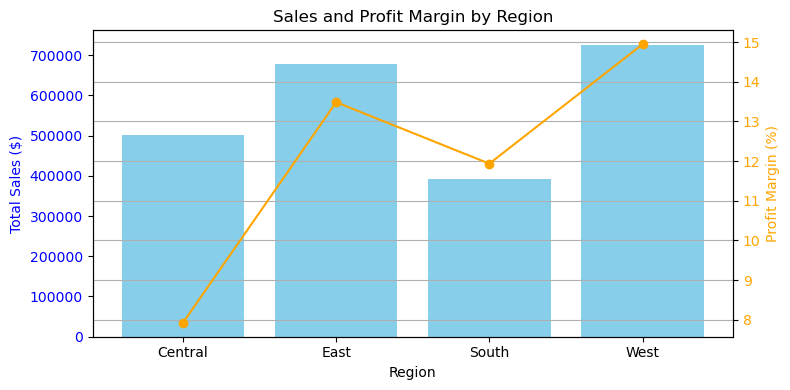

In [262]:
# Region-wise trends: Sales vs. Profit Margin
# Create a bar chart for Total Sales
fig, axis1 = plt.subplots(figsize=(8, 4))

# Plot Total Sales as a bar chart
axis1.bar(region_summary['Region'], region_summary['Total_Sales'], color='skyblue', label='Total Sales')
axis1.set_xlabel('Region')
axis1.set_ylabel('Total Sales ($)', color='blue')
axis1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit Margin
axis2 = axis1.twinx()
axis2.plot(region_summary['Region'], region_summary['Profit_Margin'], color='orange', marker='o', label='Profit Margin')
axis2.set_ylabel('Profit Margin (%)', color='orange')
axis2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Sales and Profit Margin by Region')
fig.tight_layout()
plt.grid(axis='y')

# Show the plot
plt.show()


In [25]:
print(region_summary.columns)

Index(['Region', 'Total_Sales', 'Total_Profit', 'Profit_Margin'], dtype='object')


In [146]:
print(region_summary.dtypes)

Total_Sales     float64
Total_Profit    float64
dtype: object


In [130]:
print(region_summary.columns.tolist())

['Total_Sales', 'Total_Profit']


In [152]:
print(store_df.columns.tolist())

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [37]:
# Sales and Profit Analysis by Category
category_summary = store_df.groupby('Category').agg(
    Total_sales=('Sales','sum'),
    Total_profit=('Profit','sum')).reset_index()

# Calculate Profit_Margin
category_summary['Profit_Margin'] = (category_summary['Total_profit'] / category_summary['Total_sales']) * 100

print("Sales and Profit Summary by Category:")
print(category_summary)

Sales and Profit Summary by Category:
          Category  Total_sales  Total_profit  Profit_Margin
0        Furniture  741999.7953    18451.2728       2.486695
1  Office Supplies  719047.0320   122490.8008      17.035158
2       Technology  836154.0330   145454.9481      17.395712


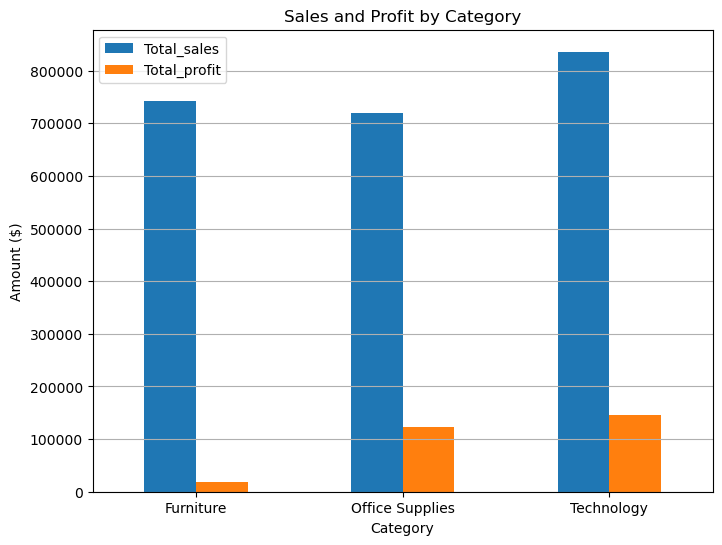

In [39]:
# Plot for Sales and Profit by Category
fig, ax2 = plt.subplots(figsize=(8, 6))
category_summary.plot(x='Category', y=['Total_sales', 'Total_profit'], kind='bar', ax=ax2)
plt.title('Sales and Profit by Category')
plt.ylabel('Amount ($)')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

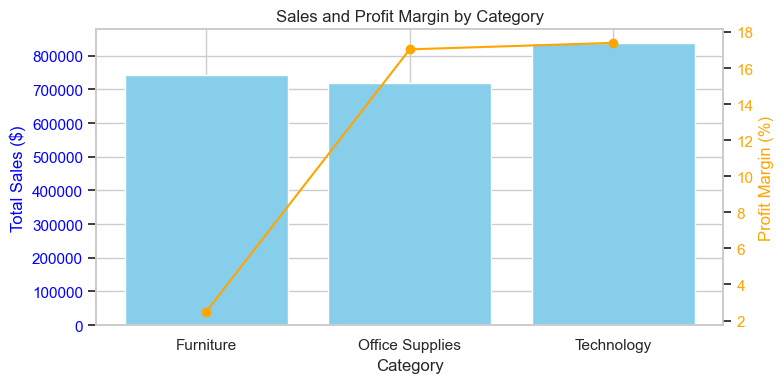

In [73]:
# Category-wise trends: Sales vs. Profit Margin
# Create a bar chart for Total Sales
fig, axis1 = plt.subplots(figsize=(8, 4))

# Plot Total Sales as a bar chart
axis1.bar(category_summary['Category'], category_summary['Total_sales'], color='skyblue', label='Total Sales')
axis1.set_xlabel('Category')
axis1.set_ylabel('Total Sales ($)', color='blue')
axis1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Profit Margin
axis2 = axis1.twinx()
axis2.plot(category_summary['Category'], category_summary['Profit_Margin'], color='orange', marker='o', label='Profit Margin')
axis2.set_ylabel('Profit Margin (%)', color='orange')
axis2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Sales and Profit Margin by Category')
fig.tight_layout()
plt.grid(axis='y')

# Show the plot
plt.show()

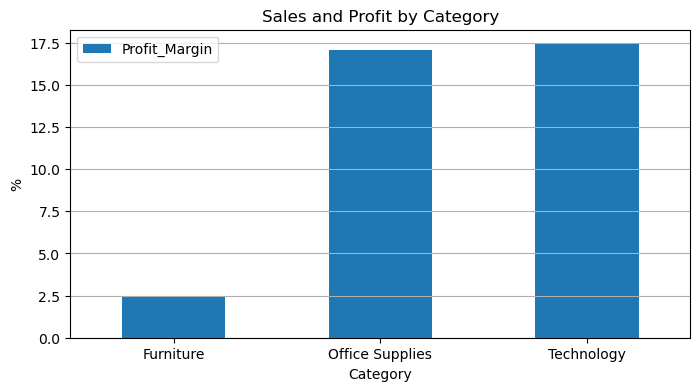

In [41]:
# Plot for Profit Margin by Category
fig, ax4 = plt.subplots(figsize=(8, 4))
category_summary.plot(x='Category', y=['Profit_Margin'], kind='bar', ax=ax4)
plt.title('Sales and Profit by Category')
plt.ylabel('%')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [47]:
# Sales and Profit Analysis by Sub-Category
subcategory_summary = store_df.groupby('Sub-Category').agg(
    Total_sales=('Sales','sum'),
    Total_profit=('Profit','sum')).reset_index()

# Calculate Profit_Margin
subcategory_summary['Profit_Margin'] = (subcategory_summary['Total_profit'] / subcategory_summary['Total_sales']) * 100
   
print("Sales and Profit Summary by SubCategory:")
print(subcategory_summary)

Sales and Profit Summary by SubCategory:
   Sub-Category  Total_sales  Total_profit  Profit_Margin
0   Accessories  167380.3180    41936.6357      25.054700
1    Appliances  107532.1610    18138.0054      16.867517
2           Art   27118.7920     6527.7870      24.071083
3       Binders  203412.7330    30221.7633      14.857361
4     Bookcases  114879.9963    -3472.5560      -3.022768
5        Chairs  328449.1030    26590.1663       8.095673
6       Copiers  149528.0300    55617.8249      37.195585
7     Envelopes   16476.4020     6964.1767      42.267582
8     Fasteners    3024.2800      949.5182      31.396504
9   Furnishings   91705.1640    13059.1436      14.240358
10       Labels   12486.3120     5546.2540      44.418672
11     Machines  189238.6310     3384.7569       1.788618
12        Paper   78479.2060    34053.5693      43.391837
13       Phones  330007.0540    44515.7306      13.489327
14      Storage  223843.6080    21278.8264       9.506113
15     Supplies   46673.5380   

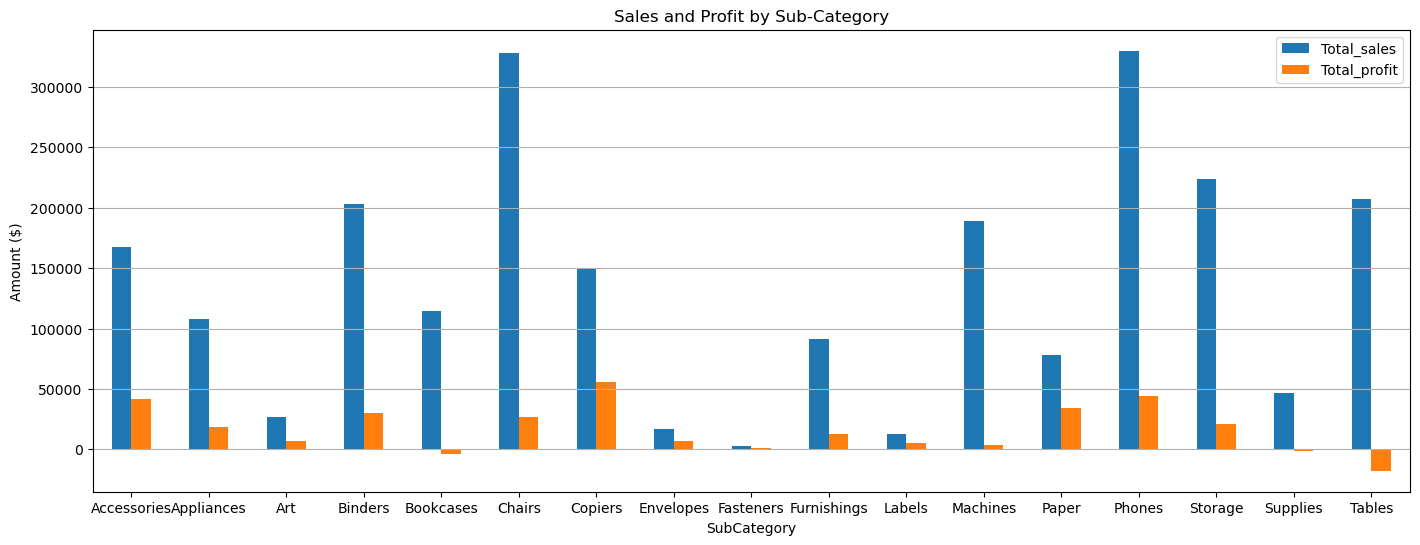

In [51]:
# Plot for Sales and Profit by Sub-Category
fig, ax3 = plt.subplots(figsize=(17, 6))
subcategory_summary.plot(x='Sub-Category', y=['Total_sales', 'Total_profit'], kind='bar', ax=ax3)
plt.title('Sales and Profit by Sub-Category')
plt.ylabel('Amount ($)')
plt.xlabel('SubCategory')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

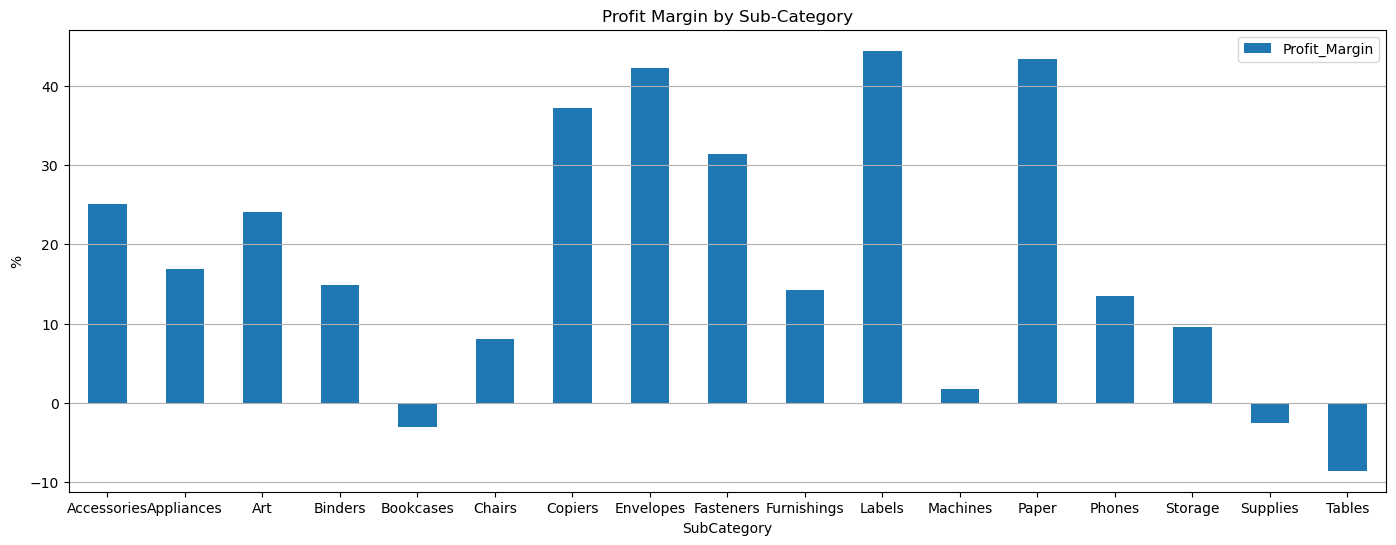

In [49]:
# Plot for Profit Margin by Sub-Category
fig, ax5 = plt.subplots(figsize=(17, 6))
subcategory_summary.plot(x='Sub-Category', y=['Profit_Margin'], kind='bar', ax=ax5)
plt.title('Profit Margin by Sub-Category')
plt.ylabel('%')
plt.xlabel('SubCategory')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

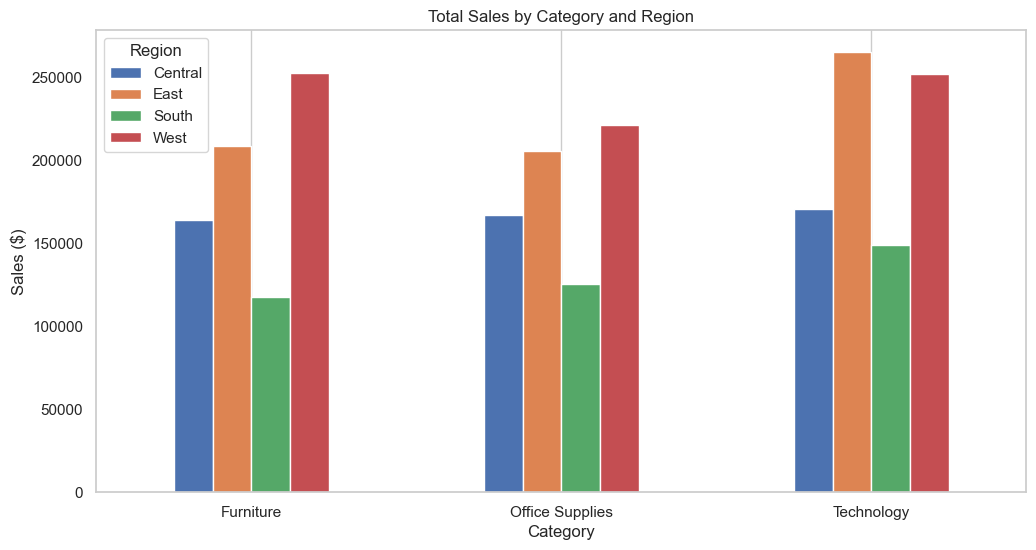

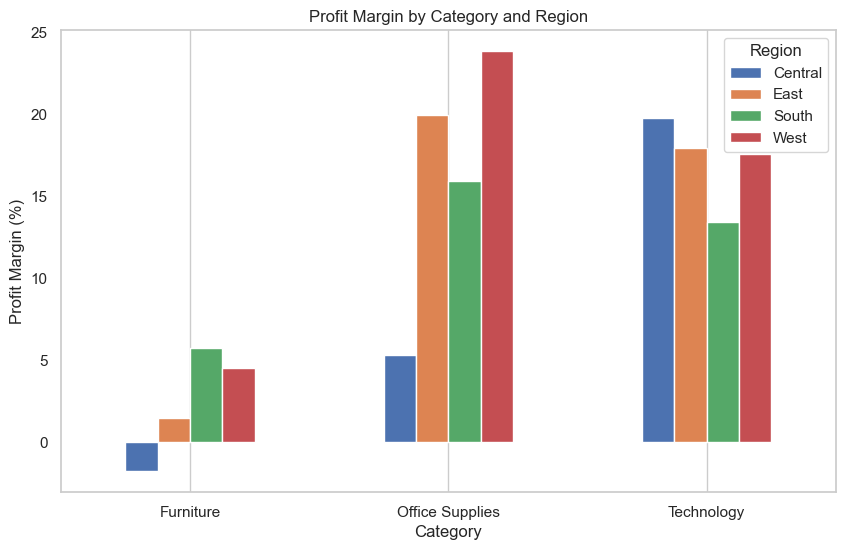

In [83]:
# Group by Region and Category to get total sales, total profit, and profit margin
category_region_summary = store_df.groupby(['Region', 'Category']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Calculate profit margin
category_region_summary['Profit_Margin (%)'] = (category_region_summary['Total_Profit'] / category_region_summary['Total_Sales']) * 100

# Pivot data for easier plotting
sales_pivot = category_region_summary.pivot(index='Category', columns='Region', values='Total_Sales')
profit_margin_pivot = category_region_summary.pivot(index='Category', columns='Region', values='Profit_Margin (%)')

# Plot total sales by category and region
sales_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Category and Region')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.legend(title='Region')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

# Plot profit margin by category and region
profit_margin_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Profit Margin by Category and Region')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Category')
plt.legend(title='Region')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [197]:
# Group by Category only to get total sales, total profit, and total discount
discount_summary = store_df.groupby(['Category']).agg(
    Total_Sales = ('Sales','sum'),
    Total_Profit = ('Profit', 'sum'),
    Total_discount = ('Discount', 'sum')).reset_index()

print(discount_summary)

          Category  Total_Sales  Total_Profit  Total_discount
0        Furniture  741999.7953    18451.2728          368.89
1  Office Supplies  719047.0320   122490.8008          947.80
2       Technology  836154.0330   145454.9481          244.40


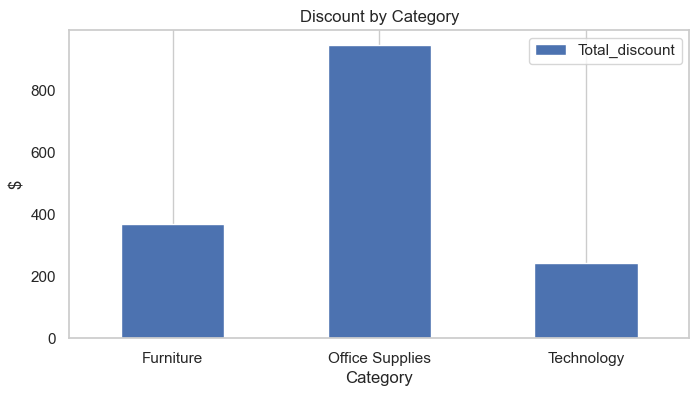

In [201]:
# Plot for Discount by Category
fig, ax20 = plt.subplots(figsize=(8, 4))
discount_summary.plot(x='Category', y=['Total_discount'], kind='bar', ax=ax20)
plt.title('Discount by Category')
plt.ylabel('$')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [171]:
# Group by Region and Category to get total sales, total profit, and total discount

discount_summary1 = store_df.groupby(['Region','Category']).agg(
    Total_Sales1 = ('Sales','sum'),
    Total_Profit1 = ('Profit', 'sum'),
    Total_discount1 = ('Discount', 'sum')).reset_index()

print(discount_summary1)

     Region         Category  Total_Sales1  Total_Profit1  Total_discount1
0   Central        Furniture   163797.1638     -2871.0494           143.04
1   Central  Office Supplies   167026.4150      8879.9799           359.40
2   Central       Technology   170416.3120     33697.4320            55.90
3      East        Furniture   208291.2040      3046.1658            92.60
4      East  Office Supplies   205516.0550     41014.5791           244.70
5      East       Technology   264973.9810     47462.0351            76.70
6     South        Furniture   117298.6840      6771.2061            40.35
7     South  Office Supplies   125651.3130     19986.3928           166.60
8     South       Technology   148771.9080     19991.8314            31.60
9      West        Furniture   252612.7435     11504.9503            92.90
10     West  Office Supplies   220853.2490     52609.8490           177.10
11     West       Technology   251991.8320     44303.6496            80.20


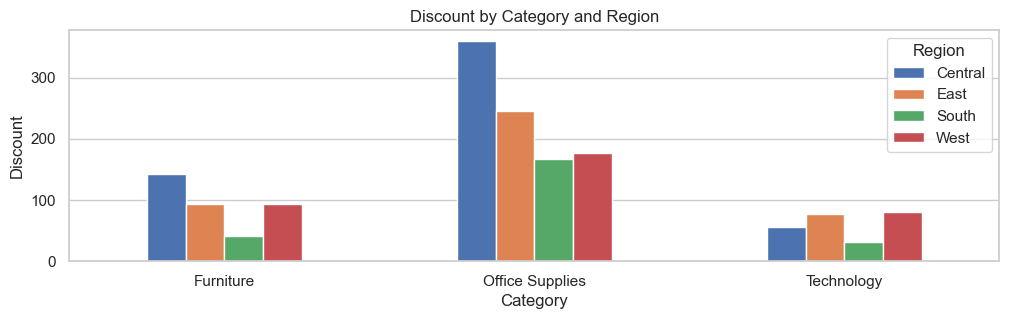

In [185]:
# Plot for Discount by Region

# Pivot data for easier plotting
sales_pivot = discount_summary1.pivot(index='Category', columns='Region', values='Total_Sales1')
discount_pivot = discount_summary1.pivot(index='Category', columns='Region', values='Total_discount1')

# Plot total sales by category and region
#sales_pivot.plot(kind='bar', figsize=(12, 3))
#plt.title('Total Sales by Category and Region')
#plt.ylabel('Sales ($)')
#plt.xlabel('Category')
#plt.legend(title='Region')
#plt.grid(axis='y')
#plt.xticks(rotation=0)
#plt.show()

# Plot profit margin by category and region
discount_pivot.plot(kind='bar', figsize=(12, 3))
plt.title('Discount by Category and Region')
plt.ylabel('Discount')
plt.xlabel('Category')
plt.legend(title='Region')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

Correlation Matrix:
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.479064  0.200795 -0.028190
Profit    0.479064  1.000000  0.066253 -0.219487
Quantity  0.200795  0.066253  1.000000  0.008623
Discount -0.028190 -0.219487  0.008623  1.000000


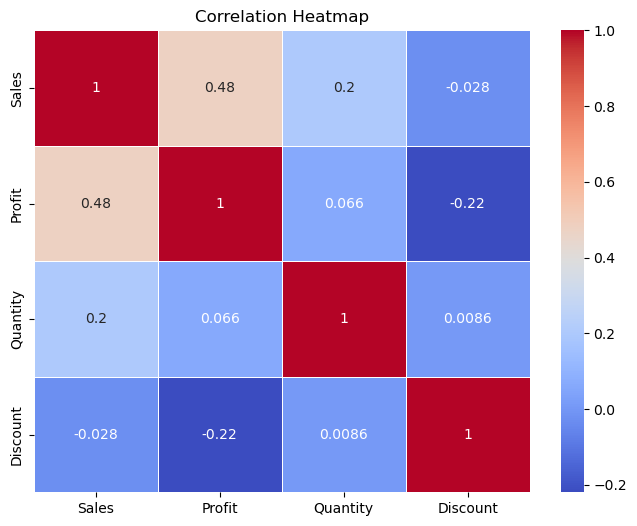

In [43]:
# Select only numerical features
numerical_features = store_df[['Sales', 'Profit', 'Quantity', 'Discount']]

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


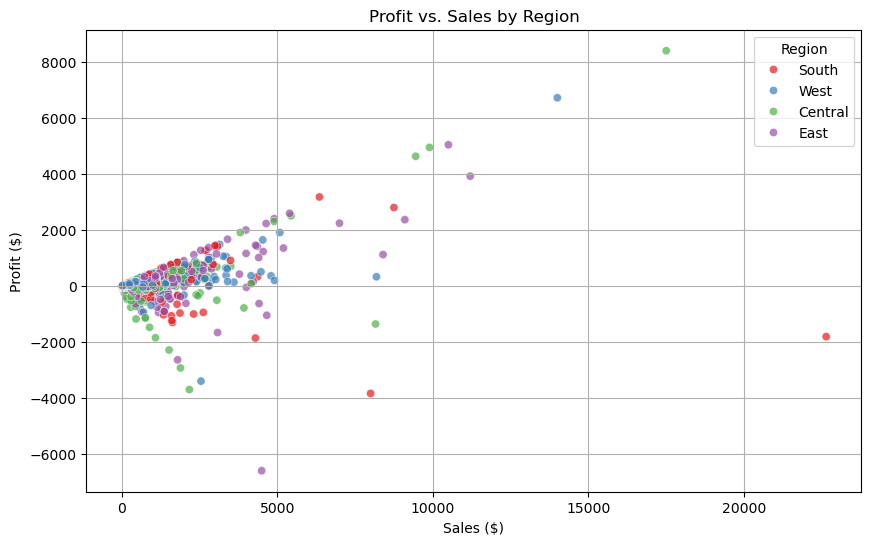

In [63]:
# Scatter plot: Profit vs. Sales, colored by Region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_df, x='Sales', y='Profit', hue='Region', palette='Set1', alpha=0.7)

# Plot settings
plt.title('Profit vs. Sales by Region')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

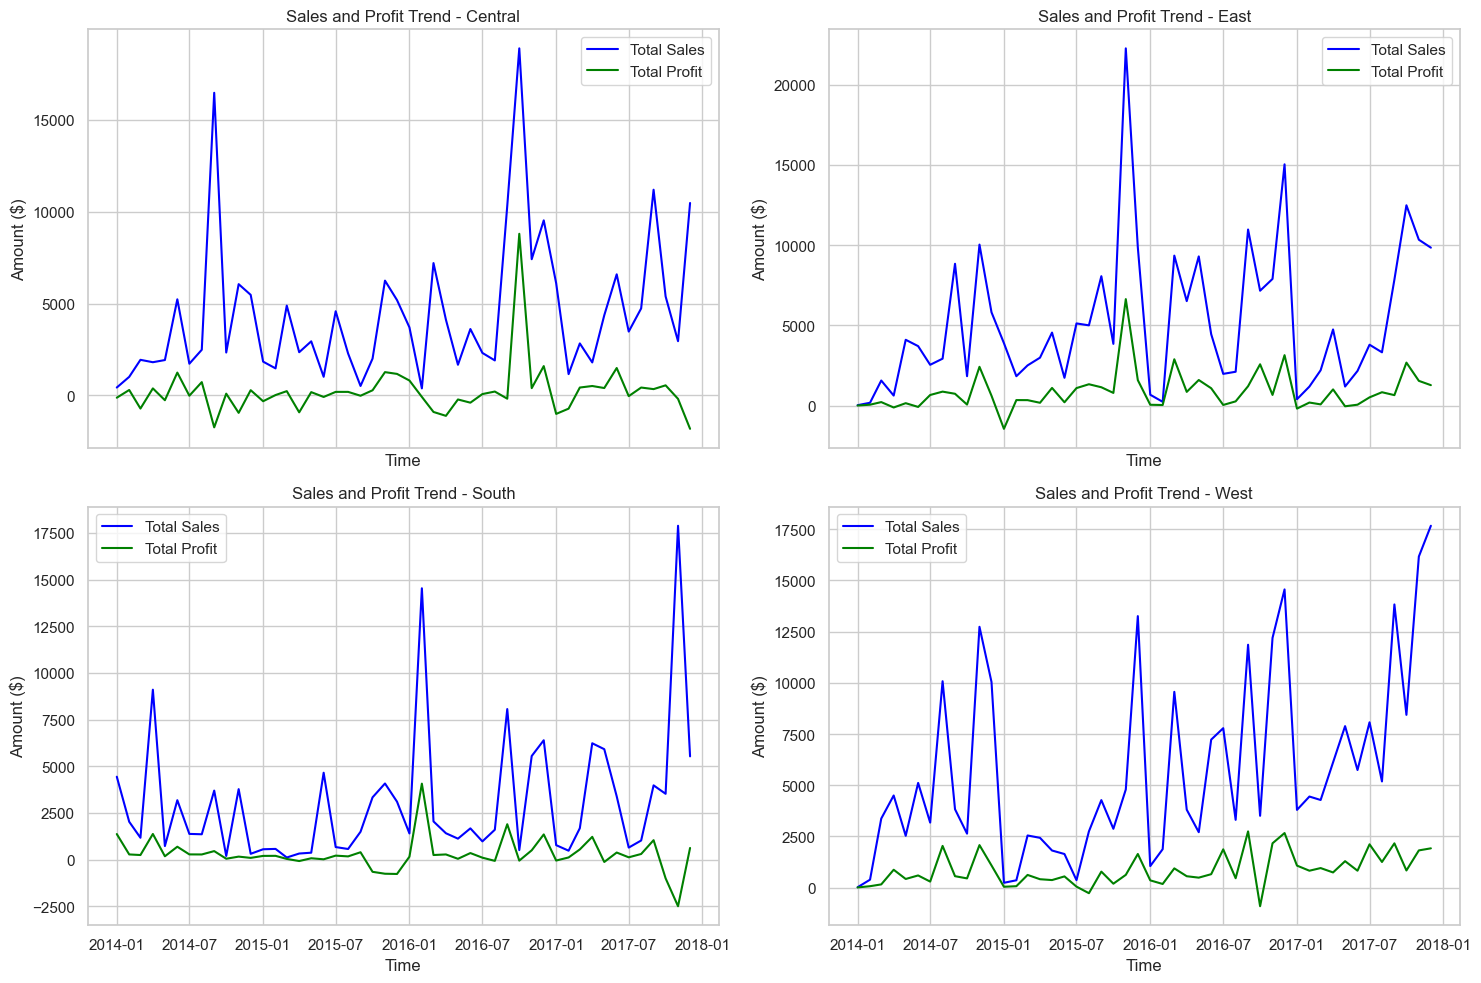

In [75]:
# Convert 'Order Date' to datetime format for time-based analysis
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'], errors='coerce')

# Extract year and month for trend analysis
store_df['Year-Month'] = store_df['Order Date'].dt.to_period('M')

# Group sales and profit by Year-Month and Region
trend_data = store_df.groupby(['Year-Month', 'Region']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Convert 'Year-Month' back to datetime for plotting
trend_data['Year-Month'] = trend_data['Year-Month'].astype(str)
trend_data['Year-Month'] = pd.to_datetime(trend_data['Year-Month'])

# Plot sales and profit trends for each region
regions = trend_data['Region'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)

for i, region in enumerate(regions):
    ax = axes[i // 2, i % 2]
    
    region_data = trend_data[trend_data['Region'] == region]
    
    ax.plot(region_data['Year-Month'], region_data['Total_Sales'], label='Total Sales', color='blue')
    ax.plot(region_data['Year-Month'], region_data['Total_Profit'], label='Total Profit', color='green')
    
    ax.set_title(f'Sales and Profit Trend - {region}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amount ($)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
